### BIGMART Sale Prediction:

In [1]:
import pandas as pd

### Pre-Processing:

In [6]:
from mlbox.preprocessing import *
from mlbox.optimisation import *
from mlbox.prediction import *

In [16]:
data_train = pd.read_csv('/home/pavankumar/pavan/Datasets/AnalyticVidya/Train.csv')
data_train.shape

(8523, 12)

In [13]:
pd.read_csv('/home/pavankumar/pavan/Datasets/AnalyticVidya/Train.csv').head(1).T

,0
Item_Identifier,FDA15
Item_Weight,9.3
Item_Fat_Content,Low Fat
Item_Visibility,0.0160473
Item_Type,Dairy
Item_MRP,249.809
Outlet_Identifier,OUT049
Outlet_Establishment_Year,1999
Outlet_Size,Medium
Outlet_Location_Type,Tier 1


### Reading Test and Train Files:

In [23]:
df=Reader(sep=",").train_test_split(['/home/pavankumar/pavan/Datasets/AnalyticVidya/Train.csv',
'/home/pavankumar/pavan/Datasets/AnalyticVidya/Test.csv'],'Item_Outlet_Sales')


reading csv : Train.csv ...
cleaning data ...
CPU time: 0.2644515037536621 seconds

reading csv : Test.csv ...
cleaning data ...
CPU time: 0.15989398956298828 seconds

> Number of common features : 11

gathering and crunching for train and test datasets ...
reindexing for train and test datasets ...
dropping training duplicates ...
dropping constant variables on training set ...

> Number of categorical features: 7
> Number of numerical features: 4
> Number of training samples : 8523
> Number of test samples : 5681

> Top sparse features (% missing values on train set):
Outlet_Size    28.3
Item_Weight    17.2
dtype: float64

> Task : regression
count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64


In [36]:
list(df)

['train', 'test', 'target']

In [40]:
print(df['train'].shape)
df['train'].head(3)

(8523, 11)


,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,249.8092,Dairy,0.016047,9.30,1999.0,OUT049,Tier 1,Medium,Supermarket Type1
1,Regular,DRC01,48.2692,Soft Drinks,0.019278,5.92,2009.0,OUT018,Tier 3,Medium,Supermarket Type2
2,Low Fat,FDN15,141.6180,Meat,0.016760,17.50,1999.0,OUT049,Tier 1,Medium,Supermarket Type1


In [41]:
print(df['test'].shape)
df['test'].head(3)

(5681, 11)


,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDW58,107.8622,Snack Foods,0.007565,20.75,1999.0,OUT049,Tier 1,Medium,Supermarket Type1
1,reg,FDW14,87.3198,Dairy,0.038428,8.30,2007.0,OUT017,Tier 2,NaN,Supermarket Type1
2,Low Fat,NCN55,241.7538,Others,0.099575,14.60,1998.0,OUT010,Tier 3,NaN,Grocery Store


### Removing Drift Variables:

In [8]:
df=Drift_thresholder().fit_transform(df)


computing drifts ...
CPU time: 2.571016550064087 seconds

> Top 10 drifts

('Outlet_Identifier', 0.044096800561553851)
('Outlet_Establishment_Year', 0.020062315147288734)
('Item_Weight', 0.014999384898841228)
('Item_Fat_Content', 0.014990552913233479)
('Item_Type', 0.013953169123523956)
('Outlet_Type', 0.013146602855432787)
('Outlet_Size', 0.012240622787300648)
('Outlet_Location_Type', 0.012224494195409719)
('Item_MRP', 0.010339541810630681)
('Item_Identifier', 0.0014956285751432929)

> Deleted variables : []
> Drift coefficients dumped into directory : save


{'target': 0       3735.1380
 1        443.4228
 2       2097.2700
 3        732.3800
 4        994.7052
 5        556.6088
 6        343.5528
 7       4022.7636
 8       1076.5986
 9       4710.5350
 10      1516.0266
 11      2187.1530
 12      1589.2646
 13      2145.2076
 14      1977.4260
 15      1547.3192
 16      1621.8888
 17       718.3982
 18      2303.6680
 19      2748.4224
 20      3775.0860
 21      4064.0432
 22      1587.2672
 23       214.3876
 24      4078.0250
 25       838.9080
 26      1065.2800
 27       308.9312
 28       178.4344
 29       125.8362
           ...    
 8493    4727.1800
 8494    1637.8680
 8495    4314.3840
 8496    3715.1640
 8497    2247.0750
 8498    1601.2490
 8499    2976.1260
 8500    1907.5170
 8501    1508.0370
 8502    3020.0688
 8503    3392.9168
 8504    4138.6128
 8505    2117.2440
 8506    3944.8650
 8507     515.9950
 8508    2587.9646
 8509     424.7804
 8510    7182.6504
 8511    4207.8560
 8512    2479.4392
 8513     595.2252
 8

### Setting the hyperparameter space:

In [43]:
space={
    'ne__numerical_strategy':{"search":"choice",
                              "space":['mean','median']},
    'ne__categorical_strategy':{"search":"choice",
                                "space":['mode']},
    'ce__strategy':{"search":"choice",
                    "space":['label_encoding','entity_embedding','random_projection']},
    'fs__strategy':{"search":"choice",
                    "space":['l1','variance','rf_feature_importance']},
    'fs__threshold':{"search":"uniform",
                     "space":[0.01, 0.3]},
    'est__max_depth':{"search":"choice",
                      "space":[3,5,7,9]},
    'est__n_estimators':{"search":"choice",
                         "space":[250,500,700,1000]}
    }

### calculating the best hyper-parameter

In [44]:
best=Optimiser(scoring="mean_squared_error",n_folds=5).optimise(space,df,40)

/home/pavankumar/miniconda3/lib/python3.6/site-packages/mlbox/optimisation/optimiser.py:77: UserWarning: Optimiser will save all your fitted models into directory 'save/joblib'. Please clear it regularly.
  +str(self.to_path)+"/joblib'. Please clear it regularly.")



##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': 'mode'}

>>> CA ENCODER :{'strategy': 'entity_embedding'}

>>> FEATURE SELECTOR :{'strategy': 'rf_feature_importance', 'threshold': 0.28305209005356574}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 7, 'n_estimators': 1000, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000, 'subsample_freq': 1}



WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared


MEAN SCORE : mean_squared_error = -1599266.06942
VARIANCE : 81183.8291473 (fold 1 = -1641731.85704, fold 2 = -1539756.36884, fold 3 = -1627041.02478, fold 4 = -1478184.73857, fold 5 = -1709616.3579)
CPU time: 328.7752242088318 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': 'mode'}

>>> CA ENCODER :{'strategy': 'entity_embedding'}

>>> FEATURE SELECTOR :{'strategy': 'variance', 'threshold': 0.04541162873194343}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 9, 'n_estimators': 1000, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000, 'subsample_

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_we


MEAN SCORE : mean_squared_error = -1589152.06078
VARIANCE : 81881.3533501 (fold 1 = -1632105.77102, fold 2 = -1537121.39176, fold 3 = -1639375.96435, fold 4 = -1455437.98478, fold 5 = -1681719.192)
CPU time: 33.57701587677002 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'median', 'categorical_strategy': 'mode'}

>>> CA ENCODER :{'strategy': 'entity_embedding'}

>>> FEATURE SELECTOR :{'strategy': 'rf_feature_importance', 'threshold': 0.08753087331328281}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 9, 'n_estimators': 700, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_we


MEAN SCORE : mean_squared_error = -1546713.85463
VARIANCE : 82306.6989464 (fold 1 = -1563993.71254, fold 2 = -1518084.20101, fold 3 = -1580852.21702, fold 4 = -1410162.41861, fold 5 = -1660476.72395)
CPU time: 104.7807195186615 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'median', 'categorical_strategy': 'mode'}

>>> CA ENCODER :{'strategy': 'random_projection'}

>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.08344014912401562}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 7, 'n_estimators': 1000, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000, 'subsample_fr

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_we


MEAN SCORE : mean_squared_error = -1385803.8802
VARIANCE : 77913.2714353 (fold 1 = -1451387.21509, fold 2 = -1350697.52268, fold 3 = -1414709.81797, fold 4 = -1250708.34152, fold 5 = -1461516.50375)
CPU time: 22.469427347183228 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': 'mode'}

>>> CA ENCODER :{'strategy': 'entity_embedding'}

>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.1404268219910473}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 7, 'n_estimators': 1000, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000, 'subsample_freq':

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_we


MEAN SCORE : mean_squared_error = -1596413.56871
VARIANCE : 82173.2866551 (fold 1 = -1631229.48556, fold 2 = -1523055.89806, fold 3 = -1640793.64607, fold 4 = -1481284.52543, fold 5 = -1705704.28843)
CPU time: 17.402886867523193 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': 'mode'}

>>> CA ENCODER :{'strategy': 'entity_embedding'}

>>> FEATURE SELECTOR :{'strategy': 'rf_feature_importance', 'threshold': 0.26089921860484444}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 9, 'n_estimators': 1000, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 500

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_we


MEAN SCORE : mean_squared_error = -1593928.16315
VARIANCE : 81413.7869587 (fold 1 = -1630949.70762, fold 2 = -1530837.90843, fold 3 = -1628824.40428, fold 4 = -1474333.37011, fold 5 = -1704695.42533)
CPU time: 44.04629421234131 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': 'mode'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> FEATURE SELECTOR :{'strategy': 'rf_feature_importance', 'threshold': 0.24158061451041568}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 5, 'n_estimators': 500, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000, 

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_we


MEAN SCORE : mean_squared_error = -1258123.08395
VARIANCE : 88624.9034951 (fold 1 = -1326792.37247, fold 2 = -1251317.03544, fold 3 = -1298281.33177, fold 4 = -1089440.769, fold 5 = -1324783.91107)
CPU time: 22.79030728340149 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'median', 'categorical_strategy': 'mode'}

>>> CA ENCODER :{'strategy': 'entity_embedding'}

>>> FEATURE SELECTOR :{'strategy': 'rf_feature_importance', 'threshold': 0.194394688129932}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 7, 'n_estimators': 700, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000, 

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_we


MEAN SCORE : mean_squared_error = -1556042.09728
VARIANCE : 76881.6445965 (fold 1 = -1581699.18073, fold 2 = -1537125.33993, fold 3 = -1594348.76071, fold 4 = -1419378.79648, fold 5 = -1647658.40855)
CPU time: 43.02654027938843 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'median', 'categorical_strategy': 'mode'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> FEATURE SELECTOR :{'strategy': 'variance', 'threshold': 0.22847939449041504}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 3, 'n_estimators': 1000, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000, 'subsample

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_we


MEAN SCORE : mean_squared_error = -1224873.70377
VARIANCE : 90924.7809398 (fold 1 = -1266037.07607, fold 2 = -1220035.46425, fold 3 = -1292933.9704, fold 4 = -1051152.42417, fold 5 = -1294209.58398)
CPU time: 6.640757083892822 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': 'mode'}

>>> CA ENCODER :{'strategy': 'entity_embedding'}

>>> FEATURE SELECTOR :{'strategy': 'rf_feature_importance', 'threshold': 0.13961600288033466}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 3, 'n_estimators': 1000, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_we


MEAN SCORE : mean_squared_error = -1483866.54708
VARIANCE : 78306.7524608 (fold 1 = -1513145.40687, fold 2 = -1441702.22434, fold 3 = -1527579.97537, fold 4 = -1355230.19443, fold 5 = -1581674.93437)
CPU time: 45.54980206489563 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'median', 'categorical_strategy': 'mode'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> FEATURE SELECTOR :{'strategy': 'rf_feature_importance', 'threshold': 0.053052254389254344}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 7, 'n_estimators': 700, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 5000

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_we


MEAN SCORE : mean_squared_error = -1338937.89264
VARIANCE : 92451.8899891 (fold 1 = -1414036.69586, fold 2 = -1309929.57515, fold 3 = -1399482.8623, fold 4 = -1169636.99039, fold 5 = -1401603.33949)
CPU time: 34.99497175216675 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'median', 'categorical_strategy': 'mode'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.14234907575515718}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 5, 'n_estimators': 250, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000, 'subsample_freq': 

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_we


MEAN SCORE : mean_squared_error = -1206217.62708
VARIANCE : 84523.2996038 (fold 1 = -1264070.88396, fold 2 = -1208025.92333, fold 3 = -1245884.00324, fold 4 = -1042834.20181, fold 5 = -1270273.12304)
CPU time: 6.361242771148682 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'median', 'categorical_strategy': 'mode'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> FEATURE SELECTOR :{'strategy': 'variance', 'threshold': 0.08454041455413107}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 5, 'n_estimators': 500, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000, 'subsample_

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_we


MEAN SCORE : mean_squared_error = -1267463.01851
VARIANCE : 90268.4978399 (fold 1 = -1311772.15319, fold 2 = -1239874.33961, fold 3 = -1340355.57199, fold 4 = -1102887.97915, fold 5 = -1342425.04863)
CPU time: 4.5705671310424805 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'median', 'categorical_strategy': 'mode'}

>>> CA ENCODER :{'strategy': 'random_projection'}

>>> FEATURE SELECTOR :{'strategy': 'rf_feature_importance', 'threshold': 0.13791946912278602}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 7, 'n_estimators': 500, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 5

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_we


MEAN SCORE : mean_squared_error = -1294743.43337
VARIANCE : 77914.711309 (fold 1 = -1351908.94235, fold 2 = -1299549.3394, fold 3 = -1300405.40404, fold 4 = -1149698.76811, fold 5 = -1372154.71297)
CPU time: 39.05957269668579 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': 'mode'}

>>> CA ENCODER :{'strategy': 'entity_embedding'}

>>> FEATURE SELECTOR :{'strategy': 'rf_feature_importance', 'threshold': 0.09127626154635964}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 7, 'n_estimators': 500, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000, 

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_we


MEAN SCORE : mean_squared_error = -1532066.10424
VARIANCE : 80548.3607314 (fold 1 = -1577832.94647, fold 2 = -1475129.07363, fold 3 = -1574863.31332, fold 4 = -1404960.12456, fold 5 = -1627545.06321)
CPU time: 39.21660017967224 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': 'mode'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.04852831742318348}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 3, 'n_estimators': 700, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000, 'subsample_freq': 1

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_we


MEAN SCORE : mean_squared_error = -1205433.53053
VARIANCE : 89618.3981483 (fold 1 = -1262941.29803, fold 2 = -1216399.18746, fold 3 = -1247232.83229, fold 4 = -1030083.44363, fold 5 = -1270510.89123)
CPU time: 7.489057540893555 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': 'mode'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> FEATURE SELECTOR :{'strategy': 'variance', 'threshold': 0.14528827533592512}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 5, 'n_estimators': 250, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000, 'subsample_fr

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_we


MEAN SCORE : mean_squared_error = -1208017.51709
VARIANCE : 82537.1258589 (fold 1 = -1250589.5326, fold 2 = -1201884.81684, fold 3 = -1256647.30716, fold 4 = -1050965.13528, fold 5 = -1280000.79357)
CPU time: 2.498816728591919 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': 'mode'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> FEATURE SELECTOR :{'strategy': 'variance', 'threshold': 0.28113393236952217}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 5, 'n_estimators': 500, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000, 'subsample_fre

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_we


MEAN SCORE : mean_squared_error = -1263340.63212
VARIANCE : 96023.6089087 (fold 1 = -1297133.82447, fold 2 = -1222723.95942, fold 3 = -1345510.26682, fold 4 = -1095820.33119, fold 5 = -1355514.7787)
CPU time: 3.862546443939209 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'median', 'categorical_strategy': 'mode'}

>>> CA ENCODER :{'strategy': 'random_projection'}

>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.2861983035368243}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 9, 'n_estimators': 250, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000, 'subsample_freq'

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_we


MEAN SCORE : mean_squared_error = -1242640.61053
VARIANCE : 85076.2355714 (fold 1 = -1304368.94145, fold 2 = -1232085.48998, fold 3 = -1280917.0759, fold 4 = -1082152.38932, fold 5 = -1313679.15598)
CPU time: 11.016139030456543 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': 'mode'}

>>> CA ENCODER :{'strategy': 'entity_embedding'}

>>> FEATURE SELECTOR :{'strategy': 'rf_feature_importance', 'threshold': 0.2899478903897947}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 5, 'n_estimators': 500, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000,

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_we


MEAN SCORE : mean_squared_error = -1512380.75551
VARIANCE : 80151.4487989 (fold 1 = -1554134.08097, fold 2 = -1456250.80183, fold 3 = -1553190.16946, fold 4 = -1386886.56544, fold 5 = -1611442.15983)
CPU time: 44.673656940460205 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'median', 'categorical_strategy': 'mode'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.021248028482212453}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 3, 'n_estimators': 250, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000, 'subsample_freq

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_we


MEAN SCORE : mean_squared_error = -1169705.2473
VARIANCE : 78373.8389554 (fold 1 = -1208773.2813, fold 2 = -1188847.9129, fold 3 = -1203930.83673, fold 4 = -1015376.24417, fold 5 = -1231597.96139)
CPU time: 8.351896047592163 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'median', 'categorical_strategy': 'mode'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.012339845005099537}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 3, 'n_estimators': 250, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000, 'subsample_freq': 1

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_we


MEAN SCORE : mean_squared_error = -1169705.2473
VARIANCE : 78373.8389554 (fold 1 = -1208773.2813, fold 2 = -1188847.9129, fold 3 = -1203930.83673, fold 4 = -1015376.24417, fold 5 = -1231597.96139)
CPU time: 9.11730432510376 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'median', 'categorical_strategy': 'mode'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.015150323795381764}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 3, 'n_estimators': 250, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000, 'subsample_freq': 1}

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_we


MEAN SCORE : mean_squared_error = -1169705.2473
VARIANCE : 78373.8389554 (fold 1 = -1208773.2813, fold 2 = -1188847.9129, fold 3 = -1203930.83673, fold 4 = -1015376.24417, fold 5 = -1231597.96139)
CPU time: 7.601864337921143 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'median', 'categorical_strategy': 'mode'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.016287860260018452}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 3, 'n_estimators': 250, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000, 'subsample_freq': 1

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_we


MEAN SCORE : mean_squared_error = -1169705.2473
VARIANCE : 78373.8389554 (fold 1 = -1208773.2813, fold 2 = -1188847.9129, fold 3 = -1203930.83673, fold 4 = -1015376.24417, fold 5 = -1231597.96139)
CPU time: 6.025026082992554 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'median', 'categorical_strategy': 'mode'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.011943923997930312}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 3, 'n_estimators': 250, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000, 'subsample_freq': 1

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_we


MEAN SCORE : mean_squared_error = -1169705.2473
VARIANCE : 78373.8389554 (fold 1 = -1208773.2813, fold 2 = -1188847.9129, fold 3 = -1203930.83673, fold 4 = -1015376.24417, fold 5 = -1231597.96139)
CPU time: 6.761509656906128 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'median', 'categorical_strategy': 'mode'}

>>> CA ENCODER :{'strategy': 'random_projection'}

>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.03780849981640719}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 3, 'n_estimators': 250, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000, 'subsample_freq':

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_we


MEAN SCORE : mean_squared_error = -1173698.92521
VARIANCE : 74200.6785021 (fold 1 = -1204128.49199, fold 2 = -1192341.26401, fold 3 = -1204587.66477, fold 4 = -1028589.53553, fold 5 = -1238847.66976)
CPU time: 8.002426385879517 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'median', 'categorical_strategy': 'mode'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.17992541260235978}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 3, 'n_estimators': 250, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000, 'subsample_freq':

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_we


MEAN SCORE : mean_squared_error = -1169705.2473
VARIANCE : 78373.8389554 (fold 1 = -1208773.2813, fold 2 = -1188847.9129, fold 3 = -1203930.83673, fold 4 = -1015376.24417, fold 5 = -1231597.96139)
CPU time: 7.124005556106567 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'median', 'categorical_strategy': 'mode'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.18230367837937833}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 3, 'n_estimators': 250, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000, 'subsample_freq': 1}

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_we


MEAN SCORE : mean_squared_error = -1169705.2473
VARIANCE : 78373.8389554 (fold 1 = -1208773.2813, fold 2 = -1188847.9129, fold 3 = -1203930.83673, fold 4 = -1015376.24417, fold 5 = -1231597.96139)
CPU time: 6.438647031784058 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'median', 'categorical_strategy': 'mode'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.17502849944604976}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 3, 'n_estimators': 250, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000, 'subsample_freq': 1}

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_we


MEAN SCORE : mean_squared_error = -1169705.2473
VARIANCE : 78373.8389554 (fold 1 = -1208773.2813, fold 2 = -1188847.9129, fold 3 = -1203930.83673, fold 4 = -1015376.24417, fold 5 = -1231597.96139)
CPU time: 9.60271692276001 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'median', 'categorical_strategy': 'mode'}

>>> CA ENCODER :{'strategy': 'random_projection'}

>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.18037328536361172}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 3, 'n_estimators': 250, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000, 'subsample_freq': 

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_we


MEAN SCORE : mean_squared_error = -1173698.92521
VARIANCE : 74200.6785021 (fold 1 = -1204128.49199, fold 2 = -1192341.26401, fold 3 = -1204587.66477, fold 4 = -1028589.53553, fold 5 = -1238847.66976)
CPU time: 10.318035364151001 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'median', 'categorical_strategy': 'mode'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.11178281454324254}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 3, 'n_estimators': 250, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000, 'subsample_freq'

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_we


MEAN SCORE : mean_squared_error = -1169705.2473
VARIANCE : 78373.8389554 (fold 1 = -1208773.2813, fold 2 = -1188847.9129, fold 3 = -1203930.83673, fold 4 = -1015376.24417, fold 5 = -1231597.96139)
CPU time: 7.7956132888793945 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'median', 'categorical_strategy': 'mode'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.11061789634654196}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 9, 'n_estimators': 250, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000, 'subsample_freq': 1

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_we


MEAN SCORE : mean_squared_error = -1236301.27481
VARIANCE : 90801.4980168 (fold 1 = -1296187.28243, fold 2 = -1228011.45791, fold 3 = -1298564.35741, fold 4 = -1062729.3501, fold 5 = -1296013.92618)
CPU time: 11.776079893112183 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'median', 'categorical_strategy': 'mode'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.20161739355111685}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 3, 'n_estimators': 700, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000, 'subsample_freq':

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_we


MEAN SCORE : mean_squared_error = -1205422.1607
VARIANCE : 87892.545203 (fold 1 = -1258751.24631, fold 2 = -1218042.61755, fold 3 = -1247014.68273, fold 4 = -1033098.09285, fold 5 = -1270204.16406)
CPU time: 20.047151803970337 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'median', 'categorical_strategy': 'mode'}

>>> CA ENCODER :{'strategy': 'random_projection'}

>>> FEATURE SELECTOR :{'strategy': 'variance', 'threshold': 0.11637440023790402}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 9, 'n_estimators': 250, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000, 'subsampl

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_we


MEAN SCORE : mean_squared_error = -1241085.51621
VARIANCE : 71601.9372859 (fold 1 = -1269824.51502, fold 2 = -1245977.13229, fold 3 = -1263979.5173, fold 4 = -1106374.44646, fold 5 = -1319271.96999)
CPU time: 7.893115520477295 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'median', 'categorical_strategy': 'mode'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.06745658147860019}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 3, 'n_estimators': 250, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000, 'subsample_freq': 

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_we


MEAN SCORE : mean_squared_error = -1169705.2473
VARIANCE : 78373.8389554 (fold 1 = -1208773.2813, fold 2 = -1188847.9129, fold 3 = -1203930.83673, fold 4 = -1015376.24417, fold 5 = -1231597.96139)
CPU time: 9.011516332626343 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'median', 'categorical_strategy': 'mode'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.06353826101725925}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 3, 'n_estimators': 1000, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000, 'subsample_freq': 1

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_we


MEAN SCORE : mean_squared_error = -1224659.52708
VARIANCE : 91144.2203968 (fold 1 = -1283746.85827, fold 2 = -1235510.41786, fold 3 = -1264779.18295, fold 4 = -1046623.8099, fold 5 = -1292637.36642)
CPU time: 13.042308568954468 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'median', 'categorical_strategy': 'mode'}

>>> CA ENCODER :{'strategy': 'random_projection'}

>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.2192844550280843}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 9, 'n_estimators': 700, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000, 'subsample_freq

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_we


MEAN SCORE : mean_squared_error = -1336067.81286
VARIANCE : 85034.1072024 (fold 1 = -1403725.69164, fold 2 = -1303793.54075, fold 3 = -1377131.89074, fold 4 = -1183987.9277, fold 5 = -1411700.0135)
CPU time: 20.27953028678894 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'median', 'categorical_strategy': 'mode'}

>>> CA ENCODER :{'strategy': 'entity_embedding'}

>>> FEATURE SELECTOR :{'strategy': 'variance', 'threshold': 0.028720201330929014}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 3, 'n_estimators': 250, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000, 'subsample

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_we


MEAN SCORE : mean_squared_error = -1435656.31935
VARIANCE : 76165.4961172 (fold 1 = -1470011.07793, fold 2 = -1414184.79336, fold 3 = -1496431.94124, fold 4 = -1296459.5426, fold 5 = -1501194.24162)
CPU time: 9.675508260726929 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'median', 'categorical_strategy': 'mode'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.25645909555281987}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 7, 'n_estimators': 1000, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000, 'subsample_freq':

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_we


MEAN SCORE : mean_squared_error = -1384457.19771
VARIANCE : 100242.387128 (fold 1 = -1465115.52754, fold 2 = -1345755.13146, fold 3 = -1445014.60851, fold 4 = -1204131.89407, fold 5 = -1462268.82697)
CPU time: 21.715749979019165 seconds


##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'median', 'categorical_strategy': 'mode'}

>>> CA ENCODER :{'strategy': 'entity_embedding'}

>>> FEATURE SELECTOR :{'strategy': 'l1', 'threshold': 0.16110315147932974}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'max_depth': 3, 'n_estimators': 250, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_bin': 255, 'min_child_samples': 10, 'min_child_weight': 5, 'min_split_gain': 0, 'nthread': -1, 'num_leaves': 31, 'objective': 'regression', 'reg_alpha': 0, 'reg_lambda': 0, 'seed': 0, 'silent': True, 'subsample': 0.9, 'subsample_for_bin': 50000, 'subsample_fre

/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_we


MEAN SCORE : mean_squared_error = -1437895.07754
VARIANCE : 78262.0204353 (fold 1 = -1472259.57741, fold 2 = -1427754.8444, fold 3 = -1495492.14315, fold 4 = -1290503.92289, fold 5 = -1503464.89985)
CPU time: 12.012459993362427 seconds



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ BEST HYPER-PARAMETERS ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

{'ce__strategy': 'label_encoding', 'est__max_depth': 3, 'est__n_estimators': 250, 'fs__strategy': 'l1', 'fs__threshold': 0.021248028482212453, 'ne__categorical_strategy': 'mode', 'ne__numerical_strategy': 'median'}


/home/pavankumar/miniconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


In [45]:
best

{'ce__strategy': 'label_encoding',
 'est__max_depth': 3,
 'est__n_estimators': 250,
 'fs__strategy': 'l1',
 'fs__threshold': 0.021248028482212453,
 'ne__categorical_strategy': 'mode',
 'ne__numerical_strategy': 'median'}

### predicting on the test dataset:


fitting the pipeline ...
CPU time: 2.3793396949768066 seconds


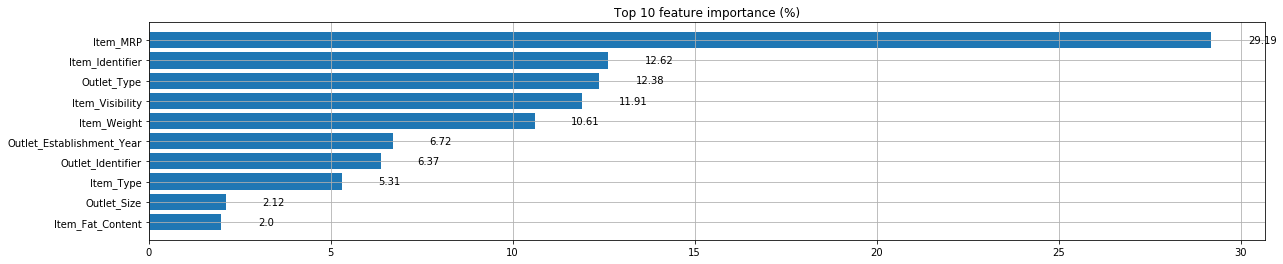


> Feature importances dumped into directory : save

predicting...
CPU time: 0.3511824607849121 seconds

> Overview on predictions : 

   Item_Outlet_Sales_predicted
0                  1453.774282
1                  1368.517192
2                   573.451980
3                  2490.896364
4                  6078.213285
5                  1850.637019
6                   563.579953
7                  2181.823123
8                  1481.428270
9                  3060.159482

dumping predictions into directory : save ...


In [46]:
Predictor().fit_predict(best,df)

### Loading Predictions Values:

In [47]:
preds = pd.read_csv('/home/pavankumar/pavan/my_python/save/Item_Outlet_Sales_predictions.csv')

In [51]:
final_submission = df['test'][['Item_Identifier','Outlet_Identifier']]
final_submission['Item_Outlet_Sales'] = preds.Item_Outlet_Sales_predicted

/home/pavankumar/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [53]:
final_submission.to_csv('final_submission.csv',index=False)

## TITANIC DISASTER prediction using MLBOX: